In [ ]:
!pip install -U pandas_profiling
!pip install -U xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Th_ML/churn_rate_prediction.csv'
df = pd.read_csv(path)
df.head(10)

customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   
5  fffe43004900440036003300320035003300    Leslie Browder   13      M   
6  fffe43004900440031003100360037003900     Bridget Balog   21      M   
7      fffe4300490044003800300035003800    Herma Torgeson   42      M   
8  fffe43004900440033003300330032003200    Pattie Helmers   44      M   
9  fffe43004900440032003000340038003300    Shaquana Leech   45      F   

  security_no region_category  membership_category joining_date  \
0     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   
5     PSG1LGF            City      Gold Membership   2016-01-08   
6     R3CX1EA            Town      Gold Membership   2015-03-19   
7     4UJ1551             NaN        No Membership   2016-07-12   
8     0481QNQ         Village    Silver Membership   2016-12-14   
9     ZHP4MCR            Town        No Membership   2016-11-30   

  joined_through_referral referral_id  ... avg_time_spent  \
0                      No    xxxxxxxx  ...         300.63   
1                       ?    CID21329  ...         306.34   
2                     Yes    CID12313  ...         516.16   
3                     Yes     CID3793  ...          53.27   
4                      No    xxxxxxxx  ...         113.13   
5                      No    xxxxxxxx  ...         433.62   
6                     Yes    CID24708  ...          55.38   
7                       ?    CID56614  ...         429.11   
8                      No    xxxxxxxx  ...         191.07   
9                      No    xxxxxxxx  ...          97.31   

  avg_transaction_value avg_frequency_login_days points_in_wallet  \
0              53005.25                     17.0           781.75   
1              12838.38                     10.0              NaN   
2              21027.00                     22.0           500.69   
3              25239.56                      6.0           567.66   
4              24483.66                     16.0           663.06   
5              13884.77                     24.0           722.27   
6               8982.50                     28.0           756.21   
7              44554.82                     24.0           568.08   
8              18362.31                     20.0              NaN   
9              19244.16                     28.0           706.23   

   used_special_discount  offer_application_preference  past_complaint  \
0                    Yes                           Yes              No   
1                    Yes                            No             Yes   
2                     No                           Yes             Yes   
3                     No                           Yes             Yes   
4                     No                           Yes             Yes   
5                    Yes                            No             Yes   
6                    Yes                            No             Yes   
7                     No                           Yes             Yes   
8                    Yes                            No             Yes   
9                     No                           Yes             Yes   

           complaint_status                  feedback churn_risk_score  
0            Not Applicable  Products always in Stock                2  
1                    Solved     Quality Customer Care                1  
2       Solved in Fo

# Data Analysis

In [ ]:
df.shape

(36992, 25)

In [ ]:
df.dtypes

customer_id                      object
Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64


In [ ]:
import matplotlib
from pandas_profiling import ProfileReport
ProfileReport(df)

<ipython-input-7-a13444f51db1>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
numerical_feature = df.columns[df.dtypes != 'O']

In [ ]:
df.loc[: , numerical_feature].isnull().any()

age                      False
days_since_last_login    False
avg_time_spent           False
avg_transaction_value    False
points_in_wallet          True
churn_risk_score         False
dtype: bool

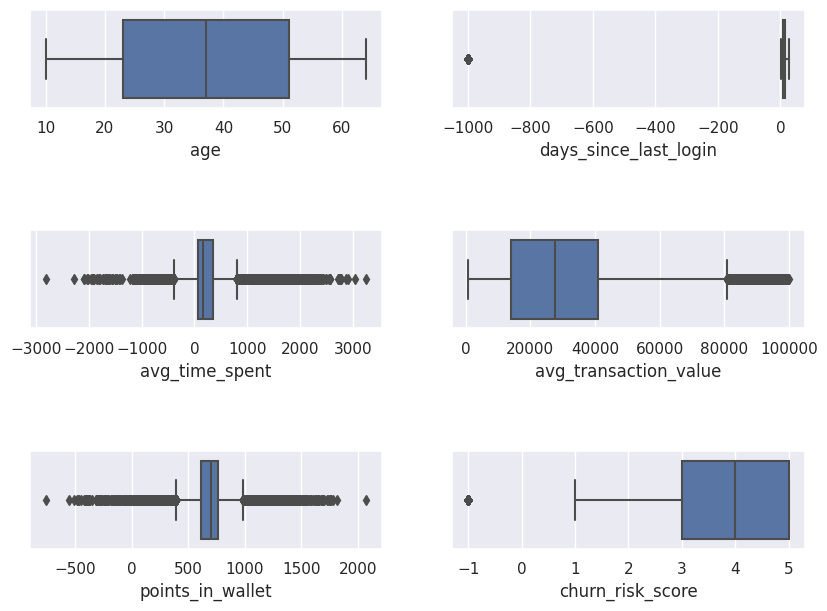

In [ ]:
def Visulize_data(data , columns):
  N = len(columns)
  sns.set()
  if N%2 == 0 :
    fig , axes = plt.subplots(N//2, 2 , figsize = (10 , 7))
  else:
    fig , axes = plt.subplots(N//2 + 1, 2 , figsize = (7 , 7))

  fig.subplots_adjust(hspace=1.25)
  for i in range(N):
    sns.boxplot(data , x = columns[i] , ax= axes[i//2 , i%2])
    axes[i//2 , i%2].set_xlabel(columns[i])

Visulize_data(df , numerical_feature)
## Almost all columns have issue
## except Age columns

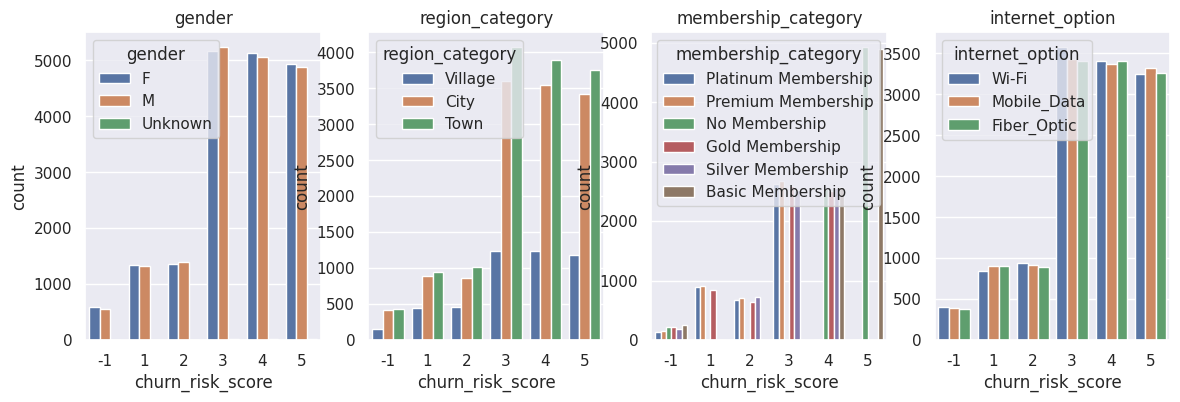

In [ ]:
cols = ['gender',"region_category","membership_category","internet_option"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="churn_risk_score", hue = str(col), data = df)
    ax.set_title(f"{col}")


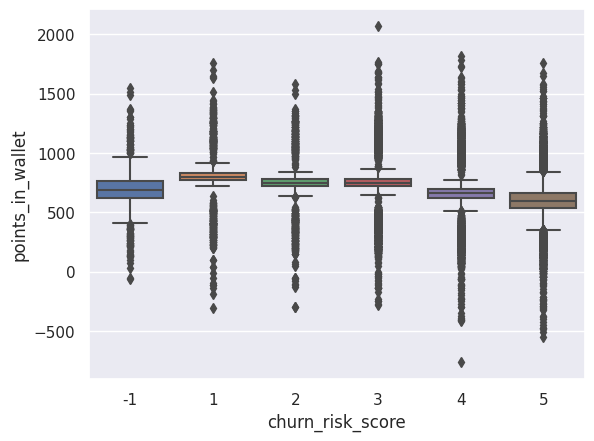

In [ ]:
sns.boxplot(data = df , x = 'churn_risk_score' , y = 'points_in_wallet')
plt.show()

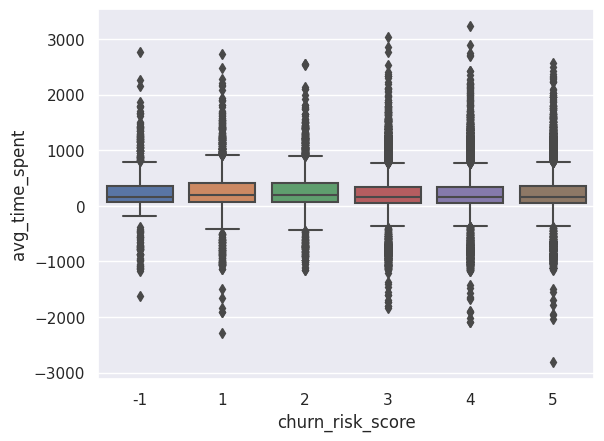

In [ ]:
sns.boxplot(data = df , x = 'churn_risk_score' , y = 'avg_time_spent')
plt.show()

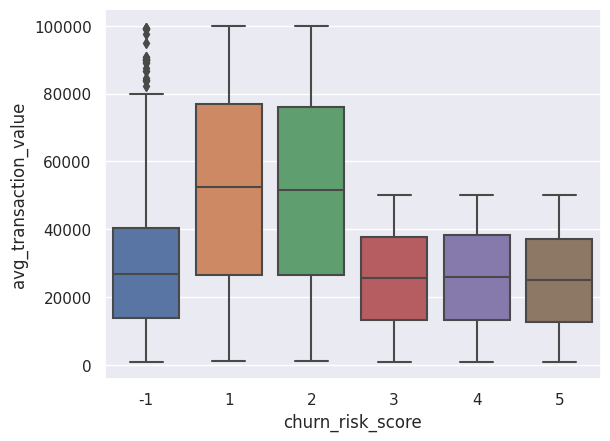

In [ ]:
sns.boxplot(data = df , x = 'churn_risk_score' , y = 'avg_transaction_value')
plt.show()

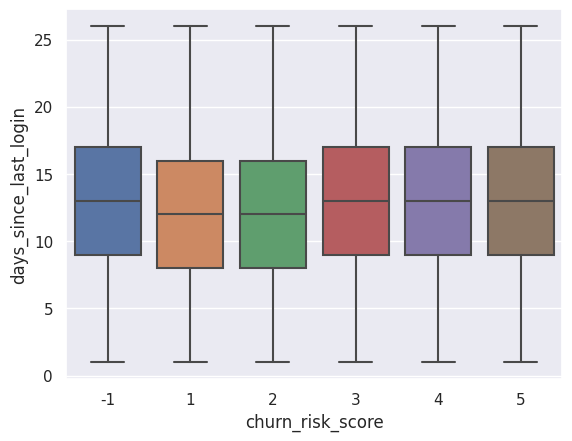

In [ ]:
sns.boxplot(data = df.loc[df['days_since_last_login'] >= 0 , :] , x = 'churn_risk_score' , y = 'days_since_last_login')
plt.show()

# Data Processing

In [ ]:
df.drop(['customer_id' ,'Name' ,  'security_no' , 'referral_id' , 'last_visit_time'] , axis = 1 , inplace = True)
# transform join_date -> days_since_joined
df['joining_date'] = df['joining_date'].astype('datetime64[ns]')
df['days_since_joined'] = df['joining_date'].apply(lambda x: (pd.Timestamp('today')-x).days)
df.drop(columns = 'joining_date' , inplace = True)
df.replace(['?' , 'Error'] , np.NaN , inplace = True)

In [ ]:
def as_type(data):
  columns = data.columns
  for i in columns:
    if data[i].dtypes == 'O':
      try:
        data[i] = data[i].astype('float64')
        print('Sucessfull')
      except:
        print('lose')
  return data
df = as_type(df)

lose
lose
lose
lose
lose
lose
lose
Sucessfull
lose
lose
lose
lose
lose


In [ ]:
df.dtypes

age                               int64
gender                           object
region_category                  object
membership_category              object
joined_through_referral          object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days        float64
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
days_since_joined                 int64
dtype: object

# Feature Engineering


*   Ta thấy các giá trị thuộc các cột 'days_since_last_login' , 'avg_time_spent' , 'avg_frequency_login_days' là không thể nào mang giá trị âm được nên các gia trị nhỏ hơn 0 ta coi chúng là các 'missing value'.
*   Cách điểm outliner có theeranhr hưởng xấu đến các model ta cũng xữ lý các giá trị này.



In [ ]:
def Apply_feature_Engineer(data , features , features_o , categorical):
  for i in features:
    data.loc[data[i] < 0 , i] = np.NaN
  for i in features_o:
    Q = data[i].quantile([0.95 , 0.05])
    data.loc[data[i] > Q[0.95] , i] = Q[0.95]
    data.loc[data[i] < Q[0.05] , i] = Q[0.05]

  data = pd.get_dummies(data , columns = categorical )
  return data



In [ ]:
features_update = ['days_since_last_login' , 'avg_time_spent' , 'avg_frequency_login_days']
features_out = ['avg_time_spent', 'points_in_wallet' , 'avg_frequency_login_days']
categorical_features = [i for i in df.columns if df[i].dtypes == 'O']
df_new = df.copy()
df_new = Apply_feature_Engineer(df_new , features_update , features_out , categorical_features)
Index_error = list(df_new['churn_risk_score'].index[df_new['churn_risk_score'] == -1])
df_new =df_new.drop(Index_error , axis = 0).reset_index(drop = True)


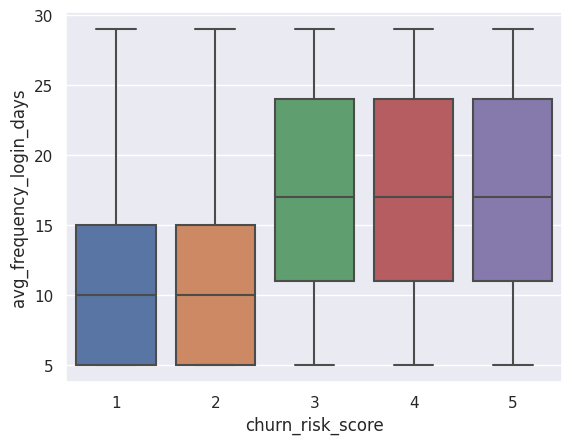

In [ ]:
sns.boxplot(data = df_new , x = 'churn_risk_score' , y = 'avg_frequency_login_days')
plt.show()

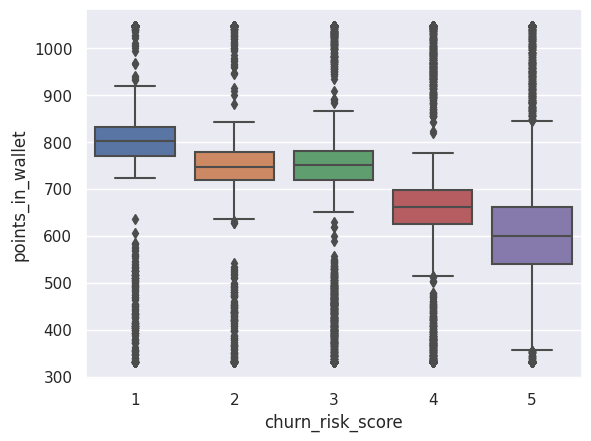

In [ ]:
sns.boxplot(data = df_new , x = 'churn_risk_score' , y = 'points_in_wallet')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TEST_SIZE = 0.2
label = 'churn_risk_score'
feature = list(df_new.columns)
feature.remove(label)
X = df_new.loc[: , feature]
Y = df_new.loc[: , label]
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size= TEST_SIZE , random_state= RANDOM_STATE)

# Module

## Tree dedication
* Ta tiến hành xử lý các missing data trực tiếp trong pipe.

In [ ]:
from sklearn.metrics import classification_report
def calculate_performance(y_true, y_pred):
    report = classification_report(y_true,y_pred)
    print("Classification Report\n",report)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
def build_model(X, y):
    clf = DecisionTreeClassifier()
    scaler = StandardScaler()
    # handle missing value
    Iter = IterativeImputer()
    estimators = [
    BayesianRidge(),
    #KNeighborsRegressor(n_neighbors=5),
]
# BayesianRidge better than KNeighborsRegressor
    param_grid = {
    'Iter__estimator':estimators,
    'tree__criterion': ["gini", "entropy", "log_loss"],
    }
    pipe = Pipeline([('scaler', scaler),('Iter' , Iter),("tree", clf)])
    model = GridSearchCV(pipe, param_grid, scoring="recall", n_jobs=-1)
    model.fit(X,y)

    return model

In [ ]:
model = build_model(X_train, Y_train)
pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


In [ ]:
calculate_performance(Y_test, pred)

Classification Report
               precision    recall  f1-score   support

           1       0.76      0.77      0.76       545
           2       0.76      0.75      0.76       541
           3       0.91      0.91      0.91      2128
           4       0.65      0.67      0.66      2004
           5       0.75      0.74      0.74      1948

    accuracy                           0.77      7166
   macro avg       0.77      0.77      0.77      7166
weighted avg       0.77      0.77      0.77      7166



In [ ]:
from sklearn.impute import SimpleImputer
def build_model_SimpleImputer(X, y):
    clf = DecisionTreeClassifier()
    scaler = StandardScaler()
    #n_estimators = [10 , 20 , 30]
    simple = SimpleImputer()
    strategys = ["mean", "median" , 'most_frequent']

    param_grid = {
    'simple__strategy':strategys,
    'tree__criterion': ["gini", "entropy", "log_loss"],
    }


    pipe = Pipeline([('simple' , simple),('scaler', scaler),("tree", clf)])
    model = GridSearchCV(pipe, param_grid, scoring="recall", n_jobs=-1)
    model.fit(X,y)

    return model

In [ ]:
model_T_S = build_model_SimpleImputer(X_train, Y_train)
# Compare on training dataset
pred = model_T_S.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
model_T_S.best_params_

{'simple__strategy': 'mean', 'tree__criterion': 'gini'}

In [ ]:
calculate_performance(Y_test, pred)

Classification Report
               precision    recall  f1-score   support

           1       0.76      0.75      0.76       545
           2       0.75      0.76      0.75       541
           3       0.91      0.91      0.91      2128
           4       0.64      0.65      0.64      2004
           5       0.73      0.72      0.73      1948

    accuracy                           0.76      7166
   macro avg       0.76      0.76      0.76      7166
weighted avg       0.76      0.76      0.76      7166



In [ ]:
!pip install -U catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier

def build_model_RF_Iter(X, y):
    clf = CatBoostClassifier()
    scaler = StandardScaler()
    n_estimators = [50 , 60 , 70]
    Iter = IterativeImputer()
    estimators = [
    BayesianRidge(),
    #KNeighborsRegressor(n_neighbors=5),
]

    param_grid = {
    'Iter__estimator':estimators,
    'tree__n_estimators': n_estimators,
    }

    # Todo: Input your scaler and logistic model into pipeline
    pipe = Pipeline([('Iter' , Iter),('scaler', scaler),("tree", clf)])
    model = GridSearchCV(pipe, param_grid, scoring="accuracy", n_jobs=-1 )
    # Todo: fit your model with X, y
    model.fit(X,y)

    return model

In [ ]:
model_RF_Iter = build_model_RF_Iter(X_train, Y_train)

Learning rate set to 0.5
0:	learn: 1.0038301	total: 68.5ms	remaining: 3.35s
1:	learn: 0.7577363	total: 87.4ms	remaining: 2.1s
2:	learn: 0.6254262	total: 107ms	remaining: 1.67s
3:	learn: 0.5563132	total: 125ms	remaining: 1.44s
4:	learn: 0.5056398	total: 151ms	remaining: 1.36s
5:	learn: 0.4697151	total: 167ms	remaining: 1.23s
6:	learn: 0.4399246	total: 184ms	remaining: 1.13s
7:	learn: 0.4268402	total: 207ms	remaining: 1.08s
8:	learn: 0.4125093	total: 226ms	remaining: 1.03s
9:	learn: 0.4009073	total: 246ms	remaining: 986ms
10:	learn: 0.3953144	total: 267ms	remaining: 947ms
11:	learn: 0.3901175	total: 285ms	remaining: 901ms
12:	learn: 0.3846642	total: 305ms	remaining: 867ms
13:	learn: 0.3830651	total: 324ms	remaining: 832ms
14:	learn: 0.3801690	total: 343ms	remaining: 799ms
15:	learn: 0.3784372	total: 361ms	remaining: 767ms
16:	learn: 0.3758078	total: 381ms	remaining: 740ms
17:	learn: 0.3732052	total: 399ms	remaining: 710ms
18:	learn: 0.3703413	total: 423ms	remaining: 689ms
19:	learn: 0.36

In [ ]:
pred = model_RF_Iter.predict(X_test)
calculate_performance(Y_test, pred)

Classification Report
               precision    recall  f1-score   support

           1       0.76      0.82      0.79       545
           2       0.80      0.74      0.77       541
           3       0.90      0.93      0.91      2128
           4       0.75      0.54      0.63      2004
           5       0.71      0.90      0.79      1948

    accuracy                           0.79      7166
   macro avg       0.78      0.78      0.78      7166
weighted avg       0.79      0.79      0.78      7166



In [ ]:
from catboost import CatBoostClassifier

def build_model_RF_SimpleImputer(X, y):
    clf = CatBoostClassifier()
    scaler = StandardScaler()
    n_estimators = [50 , 60 , 70]
    simple = SimpleImputer()
    strategys = ["mean", "median" , 'most_frequent']

    param_grid = {
    'simple__strategy':strategys,
    'tree__n_estimators': n_estimators,
    }


    # Todo: Input your scaler and logistic model into pipeline
    pipe = Pipeline([('simple' , simple),('scaler', scaler),("tree", clf)])
    model = GridSearchCV(pipe, param_grid, scoring="accuracy", n_jobs=-1 )
    # Todo: fit your model with X, y
    model.fit(X,y)

    return model

In [ ]:
model_RF_S = build_model_RF_SimpleImputer(X_train, Y_train)

Learning rate set to 0.5
0:	learn: 0.9302347	total: 40.2ms	remaining: 1.97s
1:	learn: 0.7342840	total: 80.8ms	remaining: 1.94s
2:	learn: 0.6195351	total: 109ms	remaining: 1.71s
3:	learn: 0.5449597	total: 134ms	remaining: 1.54s
4:	learn: 0.5061872	total: 157ms	remaining: 1.41s
5:	learn: 0.4761742	total: 173ms	remaining: 1.27s
6:	learn: 0.4498439	total: 191ms	remaining: 1.17s
7:	learn: 0.4352089	total: 211ms	remaining: 1.11s
8:	learn: 0.4171500	total: 228ms	remaining: 1.04s
9:	learn: 0.4045706	total: 245ms	remaining: 980ms
10:	learn: 0.3993826	total: 262ms	remaining: 930ms
11:	learn: 0.3906662	total: 282ms	remaining: 893ms
12:	learn: 0.3830427	total: 301ms	remaining: 858ms
13:	learn: 0.3814946	total: 319ms	remaining: 819ms
14:	learn: 0.3782021	total: 339ms	remaining: 790ms
15:	learn: 0.3738053	total: 356ms	remaining: 756ms
16:	learn: 0.3721665	total: 376ms	remaining: 730ms
17:	learn: 0.3707607	total: 393ms	remaining: 699ms
18:	learn: 0.3696066	total: 415ms	remaining: 678ms
19:	learn: 0.3

In [ ]:
model_RF_S.best_params_

{'simple__strategy': 'median', 'tree__n_estimators': 50}

In [ ]:
# Compare on training dataset
pred = model_RF_S.predict(X_test)
calculate_performance(Y_test, pred)

Classification Report
               precision    recall  f1-score   support

           1       0.76      0.79      0.77       545
           2       0.78      0.74      0.76       541
           3       0.90      0.93      0.92      2128
           4       0.74      0.57      0.64      2004
           5       0.72      0.87      0.79      1948

    accuracy                           0.79      7166
   macro avg       0.78      0.78      0.78      7166
weighted avg       0.79      0.79      0.78      7166



In [ ]:
from sklearn.ensemble import RandomForestClassifier
def model_RandomForest(X , Y):
    RFC = RandomForestClassifier()
    scaler = StandardScaler()
    n_estimators = [80 , 90 , 100]
    simple = SimpleImputer()
    strategys = ["median"  ,"mean", 'most_frequent']

    param_grid = {
    'simple__strategy':strategys,
    'tree__n_estimators': n_estimators,
    }


    # Todo: Input your scaler and logistic model into pipeline
    pipe = Pipeline([('simple' ,simple),('scaler', scaler),("tree", RFC )])
    # Todo: fit your model with X, y
    model =GridSearchCV(pipe, param_grid, n_jobs=-1 ,scoring="recall" )
    model.fit(X,Y)
    return model

In [ ]:
model_Random_F = model_RandomForest(X_train , Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
model_Random_F.best_params_

{'simple__strategy': 'median', 'tree__n_estimators': 80}

In [ ]:
pred = model_Random_F.predict(X_test)
calculate_performance(Y_test, pred)

Classification Report
               precision    recall  f1-score   support

           1       0.75      0.80      0.77       545
           2       0.78      0.73      0.75       541
           3       0.89      0.94      0.92      2128
           4       0.74      0.55      0.63      2004
           5       0.71      0.87      0.78      1948

    accuracy                           0.78      7166
   macro avg       0.77      0.78      0.77      7166
weighted avg       0.78      0.78      0.78      7166



## SVM
* Vì lý do thời gian train nên ta tiến hành xử lý data trước.
*  Kết quả của replace missing value với các phương pháp ("median"  ,"mean", 'most_frequent' , 'KNeighborsRegressor' , 'BayesianRidge') thì 'BayesianRidge' cho kết quả tốt nhất.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer

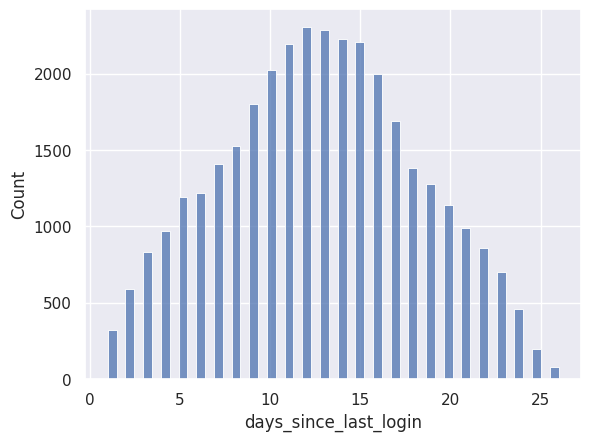

In [ ]:
sns.histplot(data = df_new, x='days_since_last_login')
plt.show()

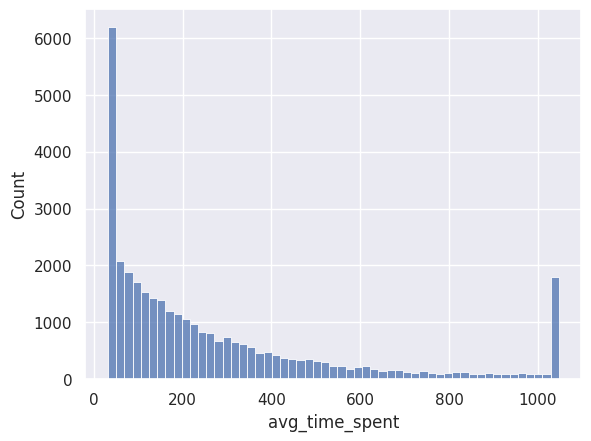

In [ ]:
sns.histplot(data = df_new , x='avg_time_spent')
plt.show()

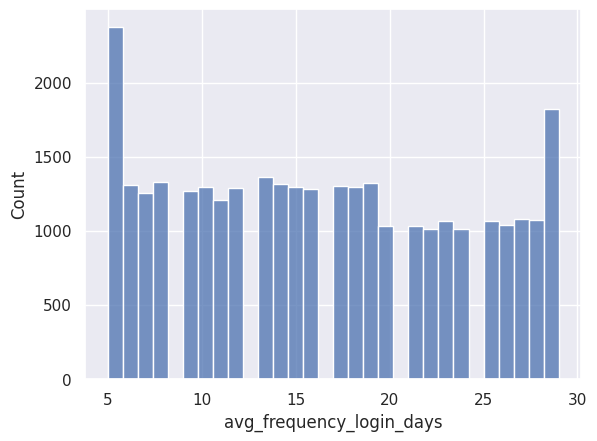

In [ ]:
sns.histplot(data = df_new , x='avg_frequency_login_days')
plt.show()

In [ ]:
def handle_missing_data(X_train_ , X_test_):
    Iter = IterativeImputer(estimator= BayesianRidge()).fit(X_train_)
    X_new_train = Iter.transform(X_train_)
    X_new_test = Iter.transform(X_test_)
    return X_new_train , X_new_test


In [ ]:
X_new_train , X_new_test = handle_missing_data(X_train , X_test)

In [ ]:
from sklearn.svm import LinearSVC
def build_model_LSVM_SimpleImputer(X, y):
    svm = LinearSVC(random_state = 0)
    scaler = StandardScaler()
    C = [0.2 , 0.5 , 1]
    #Iter = IterativeImputer(KNeighborsRegressor(n_neighbors= 30))
    param_grid = {
        #'svm__penalty':penalty,
        'svm__C' : C
    }

    # Todo: Input your scaler and logistic model into pipeline
    pipe = Pipeline([('scaler', scaler),("svm", svm)])
    model = GridSearchCV(pipe, param_grid, scoring="recall", n_jobs=-1)
    # Todo: fit your model with X, y
    model.fit(X,y)

    return model


In [ ]:
model_LSVM=build_model_LSVM_SimpleImputer(X_new_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
model_LSVM.best_params_

{'svm__C': 0.2}

In [ ]:
# Compare on training dataset
pred = model_LSVM.predict(X_new_test)
calculate_performance(Y_test, pred)

Classification Report
               precision    recall  f1-score   support

           1       0.61      0.86      0.71       545
           2       0.75      0.44      0.56       541
           3       0.86      0.88      0.87      2128
           4       0.73      0.35      0.47      2004
           5       0.66      1.00      0.80      1948

    accuracy                           0.73      7166
   macro avg       0.72      0.70      0.68      7166
weighted avg       0.74      0.73      0.70      7166



In [ ]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
def build_model_RSVM_SimpleImputer(X, y):
    svm = SVC( random_state = 0)
    scaler = StandardScaler()
    kernel = [ 'poly', 'rbf']
    c = [0.5 , 1]
    # Todo: Input your scaler and logistic model into pipeline
    param_grid = {
        'svm__kernel': kernel,
        'svm__C': c,
    }
    pipe = Pipeline([('scaler', scaler),("svm", svm)])
    model = GridSearchCV(pipe, param_grid, scoring="accuracy", n_jobs=-1 , cv = 5)
    # Todo: fit your model with X, y
    model.fit(X,y)

    return model

In [ ]:
mdoel_rsvm = build_model_RSVM_SimpleImputer(X_new_train , Y_train)

In [ ]:
pred = mdoel_rsvm .predict(X_new_test)
calculate_performance(Y_test, pred)

Classification Report
               precision    recall  f1-score   support

           1       0.62      0.72      0.66       545
           2       0.66      0.55      0.60       541
           3       0.83      0.86      0.84      2128
           4       0.67      0.31      0.43      2004
           5       0.66      0.99      0.79      1948

    accuracy                           0.71      7166
   macro avg       0.69      0.69      0.66      7166
weighted avg       0.71      0.71      0.68      7166



### SVM + FEATURES IMPORTANCE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_new_train, Y_train)

RandomForestClassifier()

In [ ]:
t = {'features':list(range(X.shape[1])) , 'value': RFC.feature_importances_}
impotance = pd.DataFrame(data = t).sort_values(by = ['value'] , ascending=False).reset_index(drop=True)

<Axes: ylabel='value'>

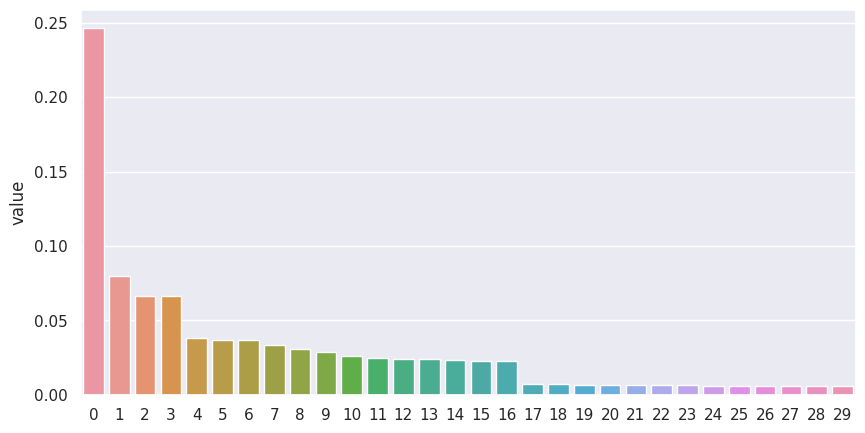

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10 , 5))
sns.barplot(data =impotance.iloc[:30] , x =list(range(30)) ,y = 'value' )

In [ ]:
features_importance = impotance.loc[:17 , 'features']
X_train_features_importance = X_new_train[: , features_importance]
X_test_features_importance = X_new_test[: , features_importance]

In [ ]:
model_RSVM = build_model_RSVM_SimpleImputer(X_train_features_importance , Y_train)

In [ ]:
model_RSVM.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=1, kernel='poly', random_state=0))])

In [ ]:
pred = model_RSVM.predict(X_test_features_importance)
calculate_performance(Y_test, pred)

Classification Report
               precision    recall  f1-score   support

           1       0.66      0.80      0.72       545
           2       0.74      0.59      0.65       541
           3       0.88      0.94      0.91      2128
           4       0.85      0.37      0.51      2004
           5       0.66      1.00      0.80      1948

    accuracy                           0.76      7166
   macro avg       0.76      0.74      0.72      7166
weighted avg       0.79      0.76      0.73      7166



In [ ]:
model_LSVM_F=build_model_LSVM_SimpleImputer(X_train_features_importance, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


In [ ]:
pred = model_LSVM_F.predict(X_test_features_importance)
calculate_performance(Y_test, pred)

Classification Report
               precision    recall  f1-score   support

           1       0.60      0.91      0.73       545
           2       0.81      0.40      0.54       541
           3       0.87      0.91      0.89      2128
           4       0.79      0.36      0.50      2004
           5       0.66      1.00      0.80      1948

    accuracy                           0.74      7166
   macro avg       0.75      0.72      0.69      7166
weighted avg       0.77      0.74      0.72      7166



## BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
moel_GaussianNB = GaussianNB().fit(X_new_train , Y_train)

In [ ]:
pred = moel_GaussianNB.predict(X_new_test)
calculate_performance(Y_test, pred)

Classification Report
               precision    recall  f1-score   support

           1       0.60      0.60      0.60       545
           2       0.75      0.28      0.40       541
           3       0.70      0.90      0.79      2128
           4       0.79      0.30      0.44      2004
           5       0.62      0.92      0.74      1948

    accuracy                           0.67      7166
   macro avg       0.69      0.60      0.59      7166
weighted avg       0.70      0.67      0.63      7166



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
def Model_LogisticRegression(X , y):
  LR = LogisticRegression(penalty= 'elasticnet' ,multi_class= 'multinomial' , solver= 'saga' , n_jobs= -1 , random_state = 0 )
  scaler = StandardScaler()
  #penalty = ['l1' , 'l2' ]
  l1_ratio = [0.1 , 0.3 , 0.5 , 0.7]
  param_grid = {
        #'LogisticR__kernel': penalty,
        'LogisticR__l1_ratio' : l1_ratio
    }
  pipe = Pipeline([('scaler', scaler),("LogisticR", LR)])
  model = GridSearchCV(pipe, param_grid, scoring="accuracy", n_jobs=-1 , cv = 5)
  # Todo: fit your model with X, y
  model.fit(X,y)
  return model

In [ ]:
model_Logistic_R = Model_LogisticRegression(X_new_train ,Y_train )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
pred = model_Logistic_R.predict(X_new_test)
calculate_performance(Y_test, pred)

Classification Report
               precision    recall  f1-score   support

           1       0.61      0.86      0.71       545
           2       0.75      0.44      0.56       541
           3       0.88      0.89      0.88      2128
           4       0.69      0.40      0.51      2004
           5       0.66      0.94      0.77      1948

    accuracy                           0.73      7166
   macro avg       0.72      0.70      0.69      7166
weighted avg       0.74      0.73      0.71      7166



# Summary
* Ta cần dự đoán chính xác cho toàn bộ các lớp. Vì ở đây nếu khách hàng đang hài lòng với dịch vụ thì ta tiếp tục phát huy. Còn khách hàng không hài long với dịch vụ thì ta cần phải thay đổi chiến lược phục vụ.Vì vậy precision và recall của tất cả các lớp đều quan trọng. Và accuracy là thông số tổng quát. Vì thế ta sẽ xét tất cả các thông số này.
* Như ở trên ta thấy CatBoostClassifier là thuật toán đạt giá trị các chỉ số cao nhất. Với chỉ số accuracy 0.79 và các thông số precision và recall của các lớp đều cao hơn các thuật toán còn lại. Vì vậy CatBoostClassifier là thuật toán được chọn.

In [ ]:
def final(model , X , Y):
  pred = model.predict(X)
  calculate_performance(Y, pred)

final(model_RF_S , X_test , Y_test)


Classification Report
               precision    recall  f1-score   support

           1       0.76      0.79      0.77       545
           2       0.78      0.74      0.76       541
           3       0.90      0.93      0.92      2128
           4       0.74      0.57      0.64      2004
           5       0.72      0.87      0.79      1948

    accuracy                           0.79      7166
   macro avg       0.78      0.78      0.78      7166
weighted avg       0.79      0.79      0.78      7166

